# Kenya Geographical Data Science Sheet 1
 Check out my Github Portfolio by following this link:
[@TralahM](https://github.com/TralahM) 
* Date: OCT 17 2018
## Step Zero: Importing the necessary libraries.
For this exercise we'll be using python's matplotlib, cartopy, shapely, geopandas to do some fun stuff.
Let's get to it then!

In [1]:
#!/usr/bin/env python
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeat




## Step One: Setting the stage for plotting.
* prepare for plotting by creating a figure object of 10 by 8 inches and add a subplot with cartopy.crs projection objects as the arguments to to sub_plot and specify the central latitude and longitude and a transform to rotate the map -90
* Download land data from Natural Earth datasets
* add basic cartopy.features OCEAN, COASTLINE,BORDERS,RIVERS,LAKES,LAND
* set the extent of the map to only reflect Kenya.

In [ ]:

fig=plt.figure(figsize=(10,8))
land_50m = cfeat.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor=cfeat.COLORS['land_alt1'])

ax=fig.add_subplot(1,1,1,projection=ccrs.LambertConformal(central_latitude=0, central_longitude=36),transform=ccrs.PlateCarree())

ax.add_feature(land_50m)
ax.add_feature(cfeat.OCEAN)
ax.add_feature(cfeat.COASTLINE)
ax.add_feature(cfeat.BORDERS)
ax.add_feature(cfeat.LAKES,alpha=0.6)
ax.add_feature(cfeat.RIVERS)
#ax.add_feature(states_provinces, edgecolor='gray')

ax.set_extent([33,42,6,-5])

## Step Two: Adding More Features to the Map
### Next is to add the county polygons,constituency polygons to the map, do some chloropleth mapping with: 
- electoral data,
- population data,
- Electricity connectivity,
- mortality rates,
- employment rates,
- number of vehicles,
- education levels,
- CO2 emissions.
- Crime statistics,
- geography data,
- cultural data,
- political data,
- Air and Sea ports data,
- road layers and Live Traffic data
- Restaurants,
- Hospitals,
- Schools,
- Government offices,
- Markets/ Trading areas
- GDP
- Revenue Data
- Cities and Major Towns

So we'll require county,constituency,ward shapefiles or geojson datasets.
co-ordinates for major towns,cities,air and sea ports, 

In [5]:
#for reading shapefiles
import cartopy.io.shapereader as shpreader
shpfilename="./data/County.shp"
reader = shpreader.Reader(shpfilename)
counties = reader.records()
county=next(counties)
#print county attributes
print(sorted(county.attributes.keys()))

['AREA', 'COUNTY', 'COUNTY3_', 'COUNTY3_ID', 'OBJECTID', 'PERIMETER', 'Shape_Area', 'Shape_Leng']


Turkana


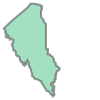

In [6]:
print(county.attributes["COUNTY"])
county.geometry

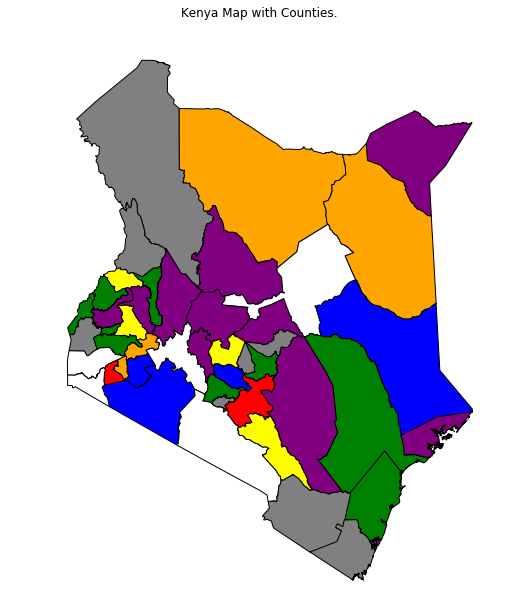

<Figure size 432x288 with 0 Axes>

In [17]:
from random import choice,shuffle
ax1 = plt.axes([0, 0, 2, 2],
                  projection=ccrs.LambertConformal(central_latitude=0, central_longitude=36),transform=ccrs.PlateCarree())
ax1.set_extent([33,42,6,-5],ccrs.Geodetic())
ax1.background_patch.set_visible(False)
ax1.outline_patch.set_visible(False)
#ax1.add_feature(cfeat.OCEAN)
#ax1.add_feature(cfeat.COASTLINE)
#ax1.add_feature(cfeat.LAKES)
#ax1.add_feature(cfeat.LAND)
#ax1.add_feature(cfeat.RIVERS)
plt.title("Kenya Map with Counties.")

for county in reader.geometries():
    facecolors=['red','green','blue','white','yellow','grey',"orange","purple"]
    shuffle(facecolors)
    edgecolor='black'
    ax1.add_geometries([county], ccrs.PlateCarree(),
                          facecolor=choice(facecolors), edgecolor=edgecolor)
    #ax1.annotate(s=rcd.attributes['COUNTY'],xy=[],axis=1)

plt.show()
plt.savefig("data/KenyaMapWithCountiesColored.png")